<a href="https://colab.research.google.com/github/MapariPrajwal/WinePredictionModel/blob/main/WineVarietyPredictionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Exploratory Data Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as epx
import nltk
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re,string,unicodedata
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from string import punctuation
from nltk import pos_tag
import re
from nltk.corpus import wordnet
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%%time
df=pd.read_csv('/content/drive/MyDrive/Internship Assignments/Assignment_Wine_data/OSX_DS_assignment.csv')

CPU times: user 1.03 s, sys: 121 ms, total: 1.15 s
Wall time: 2.66 s


In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop_words = stopwords.words('english')
new_stopwords=["variety","one","winery","could","might","shall"]
stop_words.extend(new_stopwords)
stop_words.remove("not")
stop_words=set(stop_words)

###Data Cleaning and Preprocessing

In [ ]:
#Removing special Character
def remove_special_character(content):
  return re.sub('\[[^&@#!]]*\]','',content)

#removing url links
def remove_url(content):
  return re.sub(r'http\S+','',content)

#removing useless words
def remove_stopwords(content):
  clean_data = []
  for i in content.string.split():
    if i.string.strip().lower() not in stop_words and i.string.strip().lower().isalpha():
      clean_data.append(i.strip().lower())
  return " ".join(clean_data)

#preprocessing short form to long form of words
def contraction_expansion(content):
  content = re.sub(r"won\'t","would not",content)
  content = re.sub(r"can\'t","can not",content)
  content = re.sub(r"shouldn\'t","should not",content)
  content = re.sub(r"needn\'t","need not",content)
  content = re.sub(r"won\'t","would not",content)
  content = re.sub(r"needn\'t","need not",content)
  content = re.sub(r"hasn\'t","has not",content)
  content = re.sub(r"haven\'t","have not",content)
  content = re.sub(r"weren\'t","were not",content)
  content = re.sub(r"mightn\'t","might not",content)
  content = re.sub(r"didn\'t","did not",content)
  content = re.sub(r"\'re","are",content)
  content = re.sub(r"\'s","is",content)
  content = re.sub(r"\'d","would",content)
  content = re.sub(r"\'ll","will",content)
  content = re.sub(r"\'t","not",content)
  content = re.sub(r"\'ve","have",content)
  content = re.sub(r"\'m","am",content)

#Creating statements as per our requirements
def data_cleaning(content):
  content=remove_special_character(content)
  content=remove_url(content)
  content=contraction_expansion(content)
  content=remove_stopwords(content)
  return content


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103322 entries, 0 to 103321
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_name           79191 non-null   object 
 1   country             103283 non-null  object 
 2   review_title        103322 non-null  object 
 3   review_description  103322 non-null  object 
 4   designation         73686 non-null   object 
 5   points              103322 non-null  int64  
 6   price               96359 non-null   float64
 7   province            103283 non-null  object 
 8   region_1            87254 non-null   object 
 9   region_2            44863 non-null   object 
 10  winery              103322 non-null  object 
 11  variety             103322 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 9.5+ MB


In [ ]:
%%time
df['review_description']=df['review_description'].apply(data_cleaning)
df['review_description'].head(5)

AttributeError: ignored

In [ ]:
df.isna().sum()

user_name             24131
country                  39
review_title              0
review_description        0
designation           29636
points                    0
price                  6963
province                 39
region_1              16068
region_2              58459
winery                    0
variety                   0
dtype: int64

In [ ]:
df.describe()

,points,price
count,103322.000000,96359.000000
mean,88.540630,36.781224
std,3.090903,42.867069
min,80.000000,4.000000
25%,86.000000,18.000000
50%,88.000000,27.000000
75%,91.000000,45.000000
max,100.000000,3300.000000


In [ ]:
df['country'].describe()

count     103283
unique        40
top           US
freq       48153
Name: country, dtype: object

In [ ]:
df['region_1'].describe()

count           87254
unique           1056
top       Napa Valley
freq             4158
Name: region_1, dtype: object

In [ ]:
df['region_2'].describe()

count             44863
unique               17
top       Central Coast
freq               9347
Name: region_2, dtype: object

In [ ]:
print('Unique reviews:%s'% df.review_description.nunique())
print('Unique winery:%s'% df.winery.nunique())
print('Unique wine:%s'% df.variety.nunique())
print('No. of Points:%s'% df.points.count())

Unique reviews:95434
Unique winery:14728
Unique wine:28
No. of Points:103322


In [ ]:
df.isnull().sum()

user_name             24131
country                  39
review_title              0
review_description        0
designation           29636
points                    0
price                  6963
province                 39
region_1              16068
region_2              58459
winery                    0
variety                   0
dtype: int64

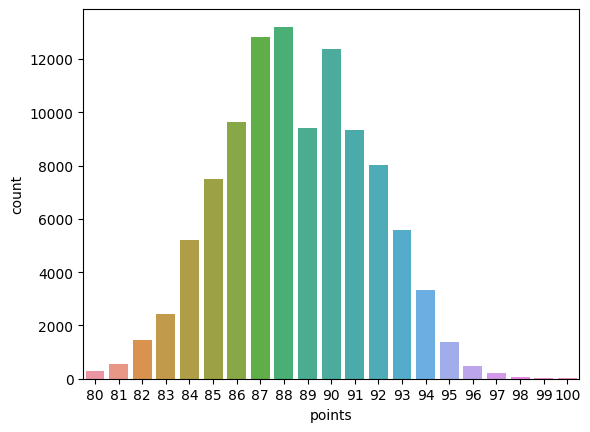

88     13216
87     12832
90     12377
86      9653
89      9424
91      9327
92      8013
85      7487
93      5587
84      5194
94      3343
83      2417
82      1470
95      1361
81       544
96       459
80       305
97       204
98        66
99        28
100       15
Name: points, dtype: int64


In [ ]:
sns.countplot(x=df['points'])
plt.show()
print(df['points'].value_counts())

## Positive Reviews Visualizations

CPU times: user 14.8 s, sys: 611 ms, total: 15.4 s
Wall time: 16.9 s


(-0.5, 1499.5, 799.5, -0.5)

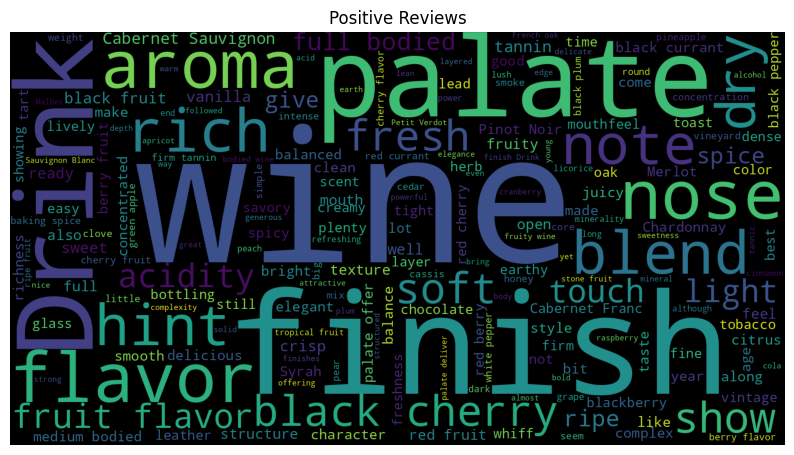

In [ ]:
%%time
sentences = df['review_description']
pos=' '.join(map(str,sentences[df['points']>=80]))
#neg=' '.join(map(str,sentences[df['points']<=40]))

pos_wordcloud = WordCloud(width =1500, height = 800,
                         background_color = 'black',
                         stopwords = stop_words,
                         min_font_size = 15).generate(pos)
plt.figure(figsize=(10,10))
plt.imshow(pos_wordcloud)
plt.title('Positive Reviews')
plt.axis('off')

##Negative Reviews Visualizations

(-0.5, 1499.5, 799.5, -0.5)

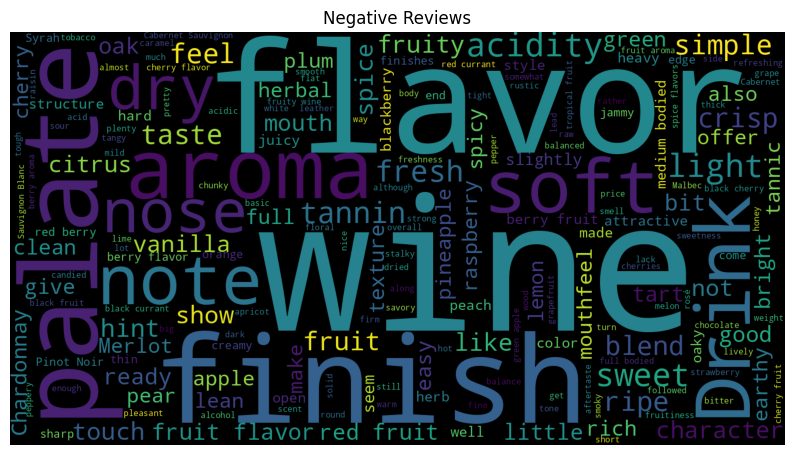

In [ ]:
"""
neg_wordcloud = WordCloud(width =1500, height = 800,
                         background_color = 'black',
                         stopwords = stop_words,
                         min_font_size = 15).generate(neg)
plt.figure(figsize=(10,10))
plt.imshow(neg_wordcloud)
plt.title('Negative Reviews')
plt.axis('off')
"""

# **Statistical Review of Data**

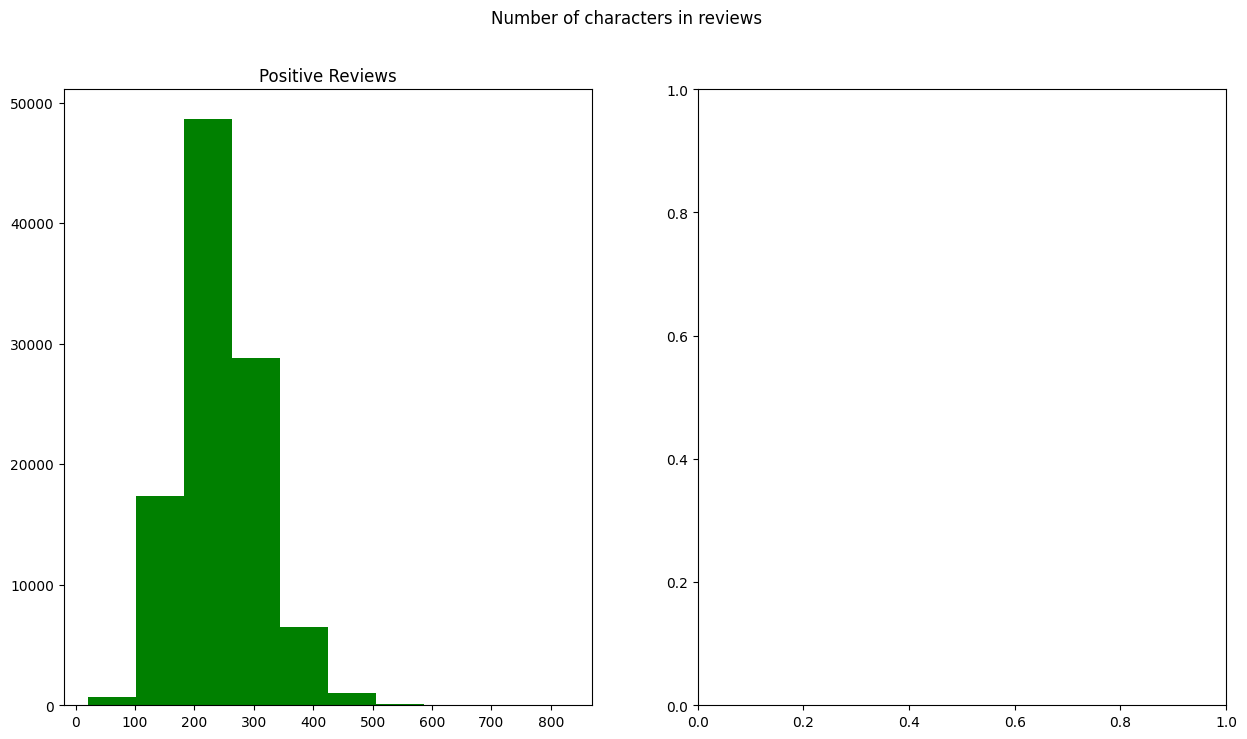

In [ ]:
#Let's check character in reviews
figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(15,8))
len_pos_review=df[df['points']>=80]['review_description'].str.len()
pos_ax.hist(len_pos_review,color='green')
pos_ax.set_title('Positive Reviews')
#len_neg_review=df[df['points']<=85]['review_description'].str.len()
#neg_ax.hist(len_neg_review,color='red')
#neg_ax.set_title('Negative Reviews')
figure.suptitle('Number of characters in reviews')
plt.show()

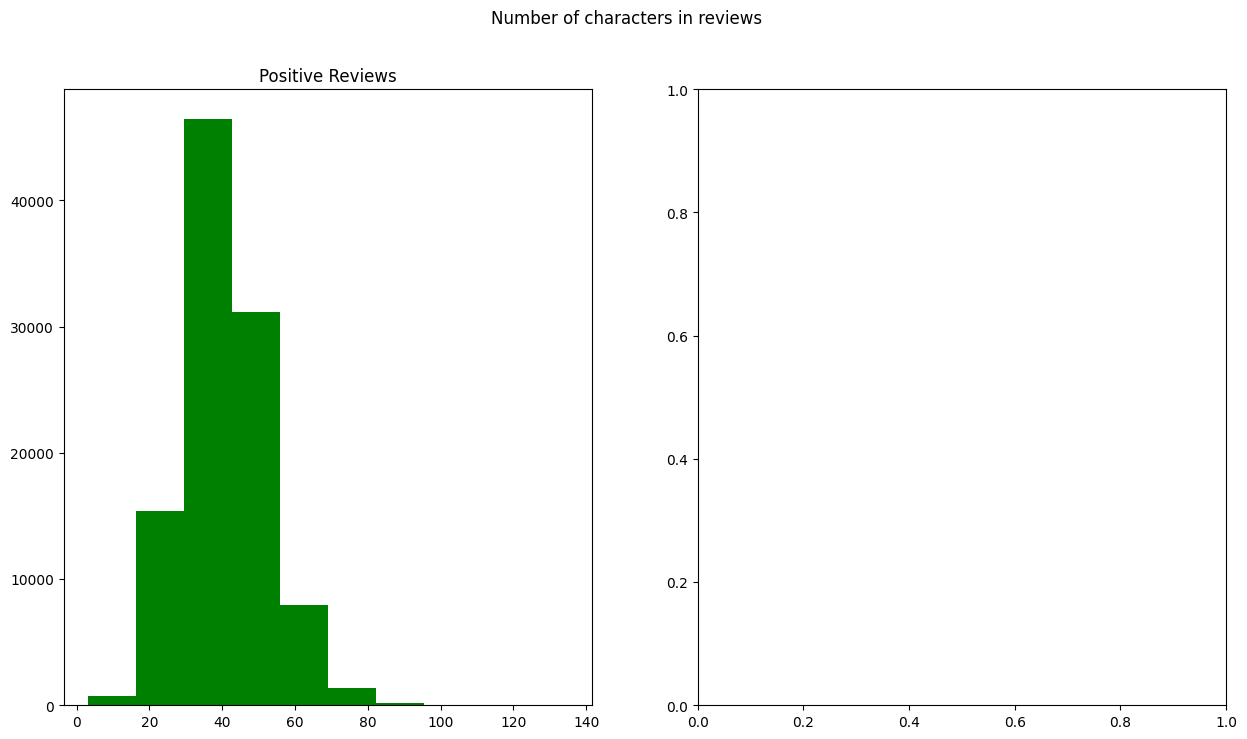

In [ ]:
#Let's check number of words in reviews
figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(15,8))
pos_word=df[df['points']>=80]['review_description'].str.split().map(lambda review: len(review))
pos_ax.hist(pos_word,color='green')
pos_ax.set_title('Positive Reviews')
#neg_word=df[df['points']<=85]['review_description'].str.split().map(lambda review: len(review))
#neg_ax.hist(neg_word,color='red')
#neg_ax.set_title('Negative Reviews')
figure.suptitle('Number of characters in reviews')
plt.show()

Text(0.5, 0.98, 'Avg. word Length in Reviews')

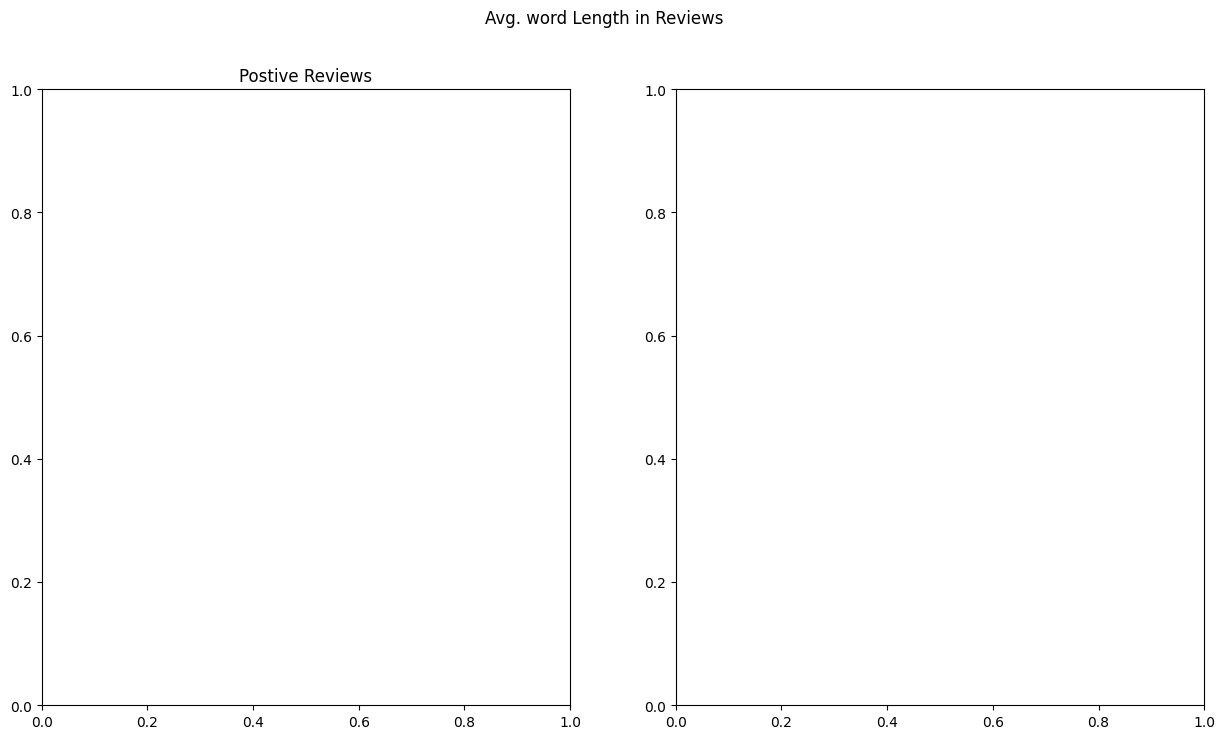

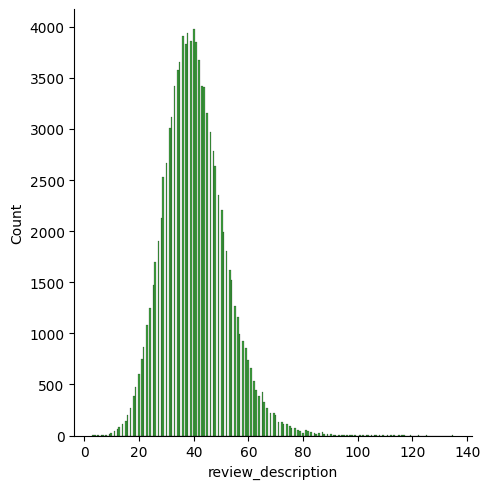

In [ ]:
#Let's find avg. words in reviews
figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(15,8))
Pos_word=df[df['points']>=80]['review_description'].str.split().map(lambda review: len(review))
sns.displot(Pos_word.map(lambda x: np.mean(x)),ax=pos_ax,color='green')
pos_ax.set_title('Postive Reviews')
#Neg_word=df[df['points']<=40]['review_description'].str.split().map(lambda review: len(review))
#sns.displot(Neg_word.map(lambda x: np.mean(x)),ax=neg_ax,color='red')
#neg_ax.set_title('Negative Reviews')
figure.suptitle('Avg. word Length in Reviews')

# **Feature Extraction**

In [ ]:
def get_top_text_ngrams(corpus,n,g):
  vec = CountVectorizer(ngram_range=(g,g)).fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  words_freq=[(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
  words_freq=sorted(words_freq,key=lambda x:x[1],reverse=True)
  return words_freq[:n]

### Postive Reviews Analysis

In [ ]:
most_common_uni = get_top_text_ngrams(df.review_description[df['points']>=80],20,1)
most_common_uni = dict(most_common_uni)
temp=pd.DataFrame(columns=["Common_Words","Count"])
temp["Common_Words"]=list(most_common_uni.keys())
temp["Count"]=list(most_common_uni.values())
fig=epx.bar(temp,x="Count",y="Common_Words",title='Common Words in Positive reviews',orientation="h",
           width=700,height=700,color='Common_Words')
fig.show()

In [ ]:
most_common_uni = get_top_text_ngrams(df.review_description[df['points']>=80],20,2)
most_common_uni = dict(most_common_uni)
temp=pd.DataFrame(columns=["Common_Words","Count"])
temp["Common_Words"]=list(most_common_uni.keys())
temp["Count"]=list(most_common_uni.values())
fig=epx.bar(temp,x="Count",y="Common_Words",title='Common BIGRAMS in Positive reviews',orientation="h",
           width=700,height=700,color='Common_Words')
fig.show()

In [ ]:
most_common_uni = get_top_text_ngrams(df.review_description[df['points']>=80],20,3)
most_common_uni = dict(most_common_uni)
temp=pd.DataFrame(columns=["Common_Words","Count"])
temp["Common_Words"]=list(most_common_uni.keys())
temp["Count"]=list(most_common_uni.values())
fig=epx.bar(temp,x="Count",y="Common_Words",title='Common TRIGRAMS in Positive reviews',orientation="h",
           width=700,height=700,color='Common_Words')
fig.show()

In [ ]:
pd.options.display.max_colwidth = 1000
df[["review_description","points","variety","country"]][(df["points"]>=80)&(df['review_description'].str.contains("not like| not want| not sure"))]

,review_description,points,variety,country
663,"While the wine has a crisp side, it's also full of red fruits and soft tannins. That makes for a wine that's fragrant, fruity, ready to drink and not likely to age much. Enjoy it now.",86,Gamay,France
882,"This wine is lean with acidity playing over the red-currant fruits, leaving a character that's light and tight. While the wine will soften it's not likely to show any more weight or richness.",84,Bordeaux-style Red Blend,France
1095,"Coming on the heels of the extraordinary 2009 vintage, this '10 is a worthy followup. It's bone dry, tannic and enormously complex, offering waves of blackberry, currant, cola, new oak and spice flavors. It's so good now, you may not want to cellar it, but try. It will begin to approach its peak after 2017.",92,Cabernet Sauvignon,US
1866,"This densely tannic wine is bold and linear, with concentrated chocolate and spice flavors. Rich black fruits are layered with acidity and a tight, mineral texture. Still firm, the wine is not likely to soften more, so drink now.",87,Portuguese Red,Portugal
2311,"Dry and rough in texture, with berry, cherry, tobacco, herb and spice flavors wrapped into edgy, slightly green tannins. Turns sharp on the finish, and not likely to age.",84,Bordeaux-style Red Blend,US
...,...,...,...,...
95577,"While wood aging is an integral part of fine Bordeaux, with this wine it is just too much. While it is young, the wood, raw and dominant, submerges the fruit to give a wine that is dense, very dry and hard at the edges. It's not likely to ever lose this quality.",84,Bordeaux-style Red Blend,France
96507,"The nose does not want to give too much away, apart from delicacy and ripe yellow pear. The palate is ripe and rounded and has a distinct yeasty, almost nutty savoriness. Pepper then makes an entrance and stays right there to linger beautifully.",90,Grüner Veltliner,Austria
98582,"This lean wine, all acidity and tannins, has a severe character that is not likely to go away. The estate has been handed down from mother to daughter for seven generations and now owned by enologist Marie Laure Latorre. It was named for the Merlot plot planted on 08/11/99, the date of the last total solar eclipse seen in France.",83,Bordeaux-style Red Blend,France
102747,"The nose does not want to give any more away than a yeasty, savory glint. On the palate, this evolves into a peppery, herbal core with real texture and depth. Fruit, apart from citrus, remains hidden for now, still held in that primary, yeasty center that already sends out sprays of spice. Delicious and intriguing now, probably even more interesting in the coming two to three years.",93,Grüner Veltliner,Austria


In [ ]:
most_common_uni = get_top_text_ngrams(df.review_description[df['points']>=80],20,4)
most_common_uni = dict(most_common_uni)
temp=pd.DataFrame(columns=["Common_Words","Count"])
temp["Common_Words"]=list(most_common_uni.keys())
temp["Count"]=list(most_common_uni.values())
fig=epx.bar(temp,x="Count",y="Common_Words",title='Common QUADGRAMS in Positive reviews',orientation="h",
           width=700,height=700,color='Common_Words')
fig.show()

In [ ]:
most_common_uni = get_top_text_ngrams(df.review_description[df['points']>=80],20,5)
most_common_uni = dict(most_common_uni)
temp=pd.DataFrame(columns=["Common_Words","Count"])
temp["Common_Words"]=list(most_common_uni.keys())
temp["Count"]=list(most_common_uni.values())
fig=epx.bar(temp,x="Count",y="Common_Words",title='Common 5-GRAMS in Positive reviews',orientation="h",
           width=700,height=700,color='Common_Words')
fig.show()

In [ ]:
pd.options.display.max_colwidth = 1000
df[["review_description","points","variety"]][(df["points"]>=80)&(df['review_description'].str.contains("blah blah blah| la la la"))]

,review_description,points,variety
90,"Medium-gold in color. Complex and inviting nose layered with a strong earthy minerality, vibrant bright fruit and intriguing notes of petrol and honey. On the palate it is racy, taut and focused full of well defined ripe succulent citrus and stone fruit. Rich, viscous texture perfectly balanced by the wine's crispness and almost steely minerality. Very long, juicy, lingering finish.",92,Riesling
91,"Slightly backward, particularly given the vintage, the wine has a complex nose with plenty of dark fruit, Turkish delight, smoked meat and earth. A full rich palate, slightly soft, it begins to run out of steam a little in mid palate, but returns with a flourish, and the finish is long and nuanced. Will repay 5+ years of cellaring.",92,Nebbiolo
92,"The vineyard is one of the better Chardonnay sources in Alexander Valley, and in this fine vintage it lends ripe pineapple, pear, Key lime pie and Mandarin orange flavors to the wine. Lots of toasty new oak adds buttered toast and vanilla, but the wood influence is in balance. Classic Burgundian-style California Chardonnay, rich and opulent.",92,Chardonnay
93,"Defines Rockpile Zinfandel in intensity of fruit and high alcohol which is in keeping with the volume. There are few red wines in the world like this. It's fully dry, with potent flavors of baked blackberries, blackcurrants, cola and peppery spices, and the tannins are huge, but negotiable. Demands the richest grilled meats and cheeses.",92,Zinfandel
94,"This sophisticated wine is mostly Cabernet Sauvignon, which accounts for the firm tannins and dense structure as well as most of the blackberries and blackcurrants. Smaller amounts of Merlot and Cabernet Franc add cherries and violets, while oak contributes smoky complexities. Rich and elegant, the wine provides lovely drinking now.",92,Cabernet Sauvignon
...,...,...,...
103317,"Notes of honeysuckle and cantaloupe sweeten this deliciously feather-light spätlese. It's intensely juicy, quenching the palate with streams of tart tangerine and grapefruit acidity, yet wraps up with a kiss of honey and peach.",90,Riesling
103318,"Citation is given as much as a decade of bottle age prior to release, which means it is pre-cellared and drinking at its peak. Baked cherry, cocoa and coconut flavors combine gracefully, with soft, secondary fruit compote highlights.",90,Pinot Noir
103319,"Well-drained gravel soil gives this wine its crisp and dry character. It is ripe and fruity, although the spice is subdued in favor of a more serious structure. This is a wine to age for a couple of years, so drink from 2017.",90,Gewürztraminer
103320,"A dry style of Pinot Gris, this is crisp with some acidity. It also has weight and a solid, powerful core of spice and baked apple flavors. With its structure still developing, the wine needs to age. Drink from 2015.",90,Pinot Gris


### Negative Reviews Analysis(Optional)

In [ ]:
most_common_uni = get_top_text_ngrams(df.review_description[df['points']<=40],20,1)
most_common_uni = dict(most_common_uni)
temp=pd.DataFrame(columns=["Common_Words","Count"])
temp["Common_Words"]=list(most_common_uni.keys())
temp["Count"]=list(most_common_uni.values())
fig=epx.bar(temp,x="Count",y="Common_Words",title='Common UNIGRAMS in Negative reviews',orientation="h",
           width=700,height=700,color='Common_Words')
fig.show()

In [ ]:
most_common_uni = get_top_text_ngrams(df.review_description[df['points']<=40],20,2)
most_common_uni = dict(most_common_uni)
temp=pd.DataFrame(columns=["Common_Words","Count"])
temp["Common_Words"]=list(most_common_uni.keys())
temp["Count"]=list(most_common_uni.values())
fig=epx.bar(temp,x="Count",y="Common_Words",title='Common BIGRAMS in Negative reviews',orientation="h",
           width=700,height=700,color='Common_Words')
fig.show()

In [ ]:
most_common_uni = get_top_text_ngrams(df.review_description[df['points']<=40],20,3)
most_common_uni = dict(most_common_uni)
temp=pd.DataFrame(columns=["Common_Words","Count"])
temp["Common_Words"]=list(most_common_uni.keys())
temp["Count"]=list(most_common_uni.values())
fig=epx.bar(temp,x="Count",y="Common_Words",title='Common TRIGRAMS in Negative reviews',orientation="h",
           width=700,height=700,color='Common_Words')
fig.show()

In [ ]:
most_common_uni = get_top_text_ngrams(df.review_description[df['points']<=40],20,4)
most_common_uni = dict(most_common_uni)
temp=pd.DataFrame(columns=["Common_Words","Count"])
temp["Common_Words"]=list(most_common_uni.keys())
temp["Count"]=list(most_common_uni.values())
fig=epx.bar(temp,x="Count",y="Common_Words",title='Common QUADGRAMS in Negative reviews',orientation="h",
           width=700,height=700,color='Common_Words')
fig.show()

In [ ]:
pd.options.display.max_colwidth = 1000
df[["review_description","points","variety"]][(df["points"]<=40)&(df['review_description'].str.contains("great|good"))].head(100)

In [ ]:
most_common_uni = get_top_text_ngrams(df.review_description[df['points']<=40],20,5)
most_common_uni = dict(most_common_uni)
temp=pd.DataFrame(columns=["Common_Words","Count"])
temp["Common_Words"]=list(most_common_uni.keys())
temp["Count"]=list(most_common_uni.values())
fig=epx.bar(temp,x="Count",y="Common_Words",title='Common QUADGRAMS in Negative reviews',orientation="h",
           width=700,height=700,color='Common_Words')
fig.show()

In [ ]:
pd.options.display.max_colwidth = 1000
df[["review_description","points","variety"]][(df["points"]<=40)&(df['review_description'].str.contains("great|good"))].head(100) #words need to changed based on requirement

In [ ]:
pd.options.display.max_colwidth = 1000
df[["review_description","points","variety"]][(df["points"]>=80)&(df['review_description'].str.contains("great|good"))].head(100) #words need to changed based on requirement

# **Feature Engineering**

In [ ]:
df['Label']=df['points'].apply(lambda x:'1' if x>=90 else('0' if x<=85 else '2'))
df=df[df.Label<'2']
data=df[['review_description','Label']]
print(data['Label'].value_counts())

1    40780
0    17417
Name: Label, dtype: int64


In [ ]:
import sys
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from prettytable import PrettyTable
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

Lemmatization

In [ ]:
class LemmaTokenizer(object):
  def __init__(self):
    self.wordnetlemma=WordNetLemmatizer()
  def __call__(self,reviews):
    return [self.wordnetlemma.lemmatize(word) for word in word_tokenize(reviews)]

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
train,test=train_test_split(data,test_size=.3,random_state=42,shuffle=True)
countvect=CountVectorizer(analyzer = "word",tokenizer=LemmaTokenizer(),ngram_range=(1,1),min_df=10,max_features=500)
tfidfvect=TfidfVectorizer(analyzer = "word",tokenizer=LemmaTokenizer(),ngram_range=(1,1),min_df=10,max_features=500)
x_train_count=countvect.fit_transform(train['review_description']).toarray()
x_test_count=countvect.transform(test['review_description']).toarray()
x_train_tfidf=tfidfvect.fit_transform(train['review_description']).toarray()
x_test_tfidf=tfidfvect.transform(test['review_description']).toarray()
y_train=train['Label']
y_test=test['Label']

In [ ]:
lgr=LogisticRegression()
lgr.fit(x_train_count,y_train)
lgr.score(x_test_count,y_test)
lgr.coef_[0]
i=0
importantFeature=PrettyTable(["Feature","Score"])
for feature,importance in zip(countvect.get_feature_names_out(),lgr.coef_[0]):
  if i<=200:
    importantFeature.add_row([feature,importance])
    i=i+1
print(importantFeature)

+---------------+-----------------------+
|    Feature    |         Score         |
+---------------+-----------------------+
|       %       |  0.15738740906514456  |
|       's      |  -0.03743632912993185 |
|       (       |  0.07787593582417111  |
|       )       |  0.07407382795686761  |
|       ,       |  0.30261207837781834  |
|       .       |  0.39336868867364594  |
|       10      |  -0.24302823390263037 |
|      100      |  0.12244433942346468  |
|      2016     |  -0.2685301059943971  |
|      2017     |   0.2982010844736346  |
|      2018     |   1.172937173414092   |
|      2019     |   2.0150708562227972  |
|      2020     |   3.0078116197381415  |
|      2022     |   1.9009474473436503  |
|       :       |   0.6089574172138931  |
|       ;       |  -0.20112217878799127 |
|       a       |  0.10374207713854036  |
|     about     |  -0.15518209178345727 |
|     accent    |   0.7185936559151406  |
|    accented   |  -0.05836635756894273 |
|      acid     |  -0.246035246852

In [ ]:
lgr=LogisticRegression()
lgr.fit(x_train_tfidf,y_train)
lgr.score(x_test_tfidf,y_test)
lgr.coef_[0]
i=0
importantFeature=PrettyTable(["Feature","Score"])
for feature,importance in zip(tfidfvect.get_feature_names_out(),lgr.coef_[0]):
  if i<=200:
    importantFeature.add_row([feature,importance])
    i=i+1
print(importantFeature)

+---------------+-----------------------+
|    Feature    |         Score         |
+---------------+-----------------------+
|       %       |   2.7970663525440456  |
|       's      |  0.22443587852692634  |
|       (       |   1.6099608722805854  |
|       )       |   1.588260504399731   |
|       ,       |   5.743188491768633   |
|       .       |   3.262983607545483   |
|       10      |   0.4231997776267392  |
|      100      |   0.6640883684275135  |
|      2016     |   0.1825662552645816  |
|      2017     |   1.7848772566916098  |
|      2018     |   3.750795186856091   |
|      2019     |   4.1305237732317295  |
|      2020     |   5.875793444938804   |
|      2022     |   3.9318917261111004  |
|       :       |   2.2893384556584038  |
|       ;       |   0.4210482942887084  |
|       a       |   1.6463835226014423  |
|     about     |    0.3938341800666    |
|     accent    |   2.602675642693552   |
|    accented   |   1.1220724538581974  |
|      acid     |  -0.188014390471

In [ ]:
train,test=train_test_split(data,test_size=.3,random_state=42,shuffle=True)
countvect=CountVectorizer(analyzer = "word",tokenizer=LemmaTokenizer(),ngram_range=(2,2),min_df=10,max_features=500)
tfidfvect=TfidfVectorizer(analyzer = "word",tokenizer=LemmaTokenizer(),ngram_range=(2,2),min_df=10,max_features=500)
x_train_count=countvect.fit_transform(train['review_description']).toarray()
x_test_count=countvect.transform(test['review_description']).toarray()
x_train_tfidf=tfidfvect.fit_transform(train['review_description']).toarray()
x_test_tfidf=tfidfvect.transform(test['review_description']).toarray()
y_train=train['Label']
y_test=test['Label']

In [ ]:
lgr=LogisticRegression()
lgr.fit(x_train_count,y_train)
lgr.score(x_test_count,y_test)
lgr.coef_[0]
i=0
importantFeature=PrettyTable(["Feature","Score"])
for feature,importance in zip(countvect.get_feature_names_out(),lgr.coef_[0]):
  if i<=200:
    importantFeature.add_row([feature,importance])
    i=i+1
print(importantFeature)

+--------------------+-----------------------+
|      Feature       |         Score         |
+--------------------+-----------------------+
|        % )         |  0.35759855080187064  |
|     % cabernet     |   0.1314071141396642  |
|      % merlot      |  0.05987748588412555  |
|      % syrah       |   0.6374838848796187  |
|        's a        |  -0.02066329929916741 |
|        , a         |   0.5051361619982773  |
|      , almost      |  0.04368808071534551  |
|      , along       |   0.792318149431615   |
|     , although     |  -0.18887906177913952 |
|       , and        |  0.11248196851309782  |
|      , black       |   1.0063138467142485  |
|    , blackberry    |   0.1574284480242604  |
|       , but        |  -0.07896141331849692 |
|      , cassis      |   0.5772015385471406  |
|      , cherry      |  -0.03691782587795466 |
|    , chocolate     |   0.3040321756272975  |
|     , cinnamon     |  0.30134363890928495  |
|      , clove       |   1.2448337607053686  |
|       , col

In [ ]:
lgr=LogisticRegression()
lgr.fit(x_train_tfidf,y_train)
lgr.score(x_test_tfidf,y_test)
lgr.coef_[0]
i=0
importantFeature=PrettyTable(["Feature","Score"])
for feature,importance in zip(tfidfvect.get_feature_names_out(),lgr.coef_[0]):
  if i<=200:
    importantFeature.add_row([feature,importance])
    i=i+1
print(importantFeature)

+--------------------+-----------------------+
|      Feature       |         Score         |
+--------------------+-----------------------+
|        % )         |   2.375338757760431   |
|     % cabernet     |   1.4374117933148836  |
|      % merlot      |    0.68705507340852   |
|      % syrah       |   1.8142091573647738  |
|        's a        |  0.34578540311545497  |
|        , a         |   2.125940125699869   |
|      , almost      |   0.647290312829295   |
|      , along       |   2.3483666466974316  |
|     , although     |  -0.08989724757269651 |
|       , and        |   0.785740278923355   |
|      , black       |   3.6604778795902697  |
|    , blackberry    |   0.9949662717589076  |
|       , but        |  -0.11736851507967928 |
|      , cassis      |   2.2194221677808836  |
|      , cherry      |   0.4132679926817331  |
|    , chocolate     |   1.2941628273272214  |
|     , cinnamon     |   1.4962921019450521  |
|      , clove       |   2.9405059985157846  |
|       , col

In [ ]:
train,test=train_test_split(data,test_size=.3,random_state=42,shuffle=True)
countvect=CountVectorizer(analyzer = "word",tokenizer=LemmaTokenizer(),ngram_range=(3,3),min_df=10,max_features=500)
tfidfvect=TfidfVectorizer(analyzer = "word",tokenizer=LemmaTokenizer(),ngram_range=(3,3),min_df=10,max_features=500)
x_train_count=countvect.fit_transform(train['review_description']).toarray()
x_test_count=countvect.transform(test['review_description']).toarray()
x_train_tfidf=tfidfvect.fit_transform(train['review_description']).toarray()
x_test_tfidf=tfidfvect.transform(test['review_description']).toarray()
y_train=train['Label']
y_test=test['Label']

In [ ]:
lgr=LogisticRegression()
lgr.fit(x_train_count,y_train)
lgr.score(x_test_count,y_test)
lgr.coef_[0]
i=0
importantFeature=PrettyTable(["Feature","Score"])
for feature,importance in zip(countvect.get_feature_names_out(),lgr.coef_[0]):
  if i<=200:
    importantFeature.add_row([feature,importance])
    i=i+1
print(importantFeature)

+-----------------------+-----------------------+
|        Feature        |         Score         |
+-----------------------+-----------------------+
|         % ) ,         |  0.06023784603250209  |
|        % ) and        |   0.8790580316072726  |
|    % cabernet franc   |   0.6030505363889455  |
|  % cabernet sauvignon |  0.06381326004233799  |
|       % merlot ,      |  -0.16973264001243035 |
|      % new french     |   0.9246198217940802  |
|     % petit verdot    |   0.5992553235977169  |
|       % syrah ,       |   0.9521540125411906  |
|        , a well       |  0.22557566540681456  |
|      , along with     |   0.7778657660896204  |
|        , and a        |  0.38875972199900555  |
|        , and it       |  0.17657987590758475  |
|      , and should     |   2.226633520339403   |
|       , and the       |  0.16295304914318345  |
|       , and this      |   0.5372806013155143  |
|      , anise and      |   0.6573591821449948  |
|     , baking spice    |   0.3685413623613606  |


In [ ]:
lgr=LogisticRegression()
lgr.fit(x_train_tfidf,y_train)
lgr.score(x_test_tfidf,y_test)
lgr.coef_[0]
i=0
importantFeature=PrettyTable(["Feature","Score"])
for feature,importance in zip(tfidfvect.get_feature_names_out(),lgr.coef_[0]):
  if i<=200:
    importantFeature.add_row([feature,importance])
    i=i+1
print(importantFeature)

+-----------------------+-----------------------+
|        Feature        |         Score         |
+-----------------------+-----------------------+
|         % ) ,         |   1.004062104697445   |
|        % ) and        |   1.5059936868422787  |
|    % cabernet franc   |   1.4420642450929995  |
|  % cabernet sauvignon |   0.8653575174954456  |
|       % merlot ,      |  0.10124140632664382  |
|      % new french     |   2.0369604893752946  |
|     % petit verdot    |   1.2783647415531174  |
|       % syrah ,       |   1.7850917225367142  |
|        , a well       |   0.8278093178106181  |
|      , along with     |   1.6097803284876657  |
|        , and a        |   0.738049725606595   |
|        , and it       |   0.439680200937835   |
|      , and should     |   3.291883350835567   |
|       , and the       |  0.48267622545836203  |
|       , and this      |   0.8208391097313308  |
|      , anise and      |   1.0948787161857116  |
|     , baking spice    |   1.1810303734205692  |


In [ ]:
train,test=train_test_split(data,test_size=.3,random_state=42,shuffle=True)
countvect=CountVectorizer(analyzer = "word",tokenizer=LemmaTokenizer(),ngram_range=(1,3),min_df=10,max_features=500)
tfidfvect=TfidfVectorizer(analyzer = "word",tokenizer=LemmaTokenizer(),ngram_range=(1,3),min_df=10,max_features=500)
x_train_count=countvect.fit_transform(train['review_description']).toarray()
x_test_count=countvect.transform(test['review_description']).toarray()
x_train_tfidf=tfidfvect.fit_transform(train['review_description']).toarray()
x_test_tfidf=tfidfvect.transform(test['review_description']).toarray()
y_train=train['Label']
y_test=test['Label']

In [ ]:
from sklearn.feature_selection import chi2
import numpy as np
N=5000
Number=1
featureselection=PrettyTable(["Unigram","Bigram","Trigram"])
for category in train['Label'].unique():
  features_chi2=chi2(x_train_tfidf,train['Label']==category)
  indices=np.argsort(features_chi2[0])
  feature_names=np.array(tfidfvect.get_feature_names_out())[indices]
  unigrams = [x for x in feature_names if len(x.split(' '))==1]
  bigrams = [x for x in feature_names if len(x.split(' '))==2]
  trigrams = [x for x in feature_names if len(x.split(' '))==3]
  print("%s. %s:"%(Number,category))
  print("\t# Unigrams :\n\t. %s"%('\n\t. '.join(unigrams[-N:])))
  print("\t# Bigrams :\n\t. %s"%('\n\t. '.join(bigrams[-N:])))
  print("\t# Trigrams :\n\t. %s"%('\n\t. '.join(trigrams[-N:])))
  Number+=1

1. 1:
	# Unigrams :
	. ;
	. make
	. style
	. round
	. here
	. noir
	. merlot
	. you
	. pinot
	. currant
	. body
	. raspberry
	. grapefruit
	. on
	. while
	. strong
	. pear
	. nose
	. just
	. acidity
	. note
	. now
	. refreshing
	. oak
	. be
	. grape
	. is
	. lime
	. plenty
	. blend
	. lot
	. hint
	. a
	. which
	. baked
	. an
	. way
	. fresh
	. tangy
	. bright
	. apricot
	. almost
	. creamy
	. peach
	. .
	. strawberry
	. up
	. although
	. syrah
	. mint
	. are
	. malbec
	. that
	. vanilla
	. out
	. lead
	. sauvignon
	. 's
	. than
	. white
	. lemon
	. this
	. lively
	. orange
	. toast
	. scent
	. red
	. edge
	. touch
	. plum
	. made
	. along
	. very
	. to
	. give
	. cola
	. quite
	. even
	. earthy
	. perfumed
	. berry
	. smoky
	. palate
	. floral
	. there
	. tannic
	. color
	. with
	. also
	. honey
	. cherry
	. mouthfeel
	. wine
	. come
	. riesling
	. and
	. or
	. solid
	. for
	. fruit
	. have
	. mix
	. at
	. weight
	. tropical
	. spicy
	. wood
	. end
	. offer
	. apple
	. more
	. offering

#**Model Selection**

# Logistic Regression Model

In [ ]:
import scipy as sp
import sklearn as sk
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,roc_auc_score,precision_score,recall_score
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

In [ ]:
model_1 = Pipeline(
    steps=[
        ("classifier",LogisticRegression())
    ]
)

In [ ]:
%%time
model_1.fit(x_train_tfidf,y_train)

CPU times: user 5.56 s, sys: 478 ms, total: 6.04 s
Wall time: 3.58 s


Pipeline(steps=[('classifier', LogisticRegression())])

In [ ]:
%%time
print("Precision Score on Train Dataset: %s"% precision_score(y_train,model_1.predict(x_train_tfidf),average='micro'))
print("AUC Score on Train Dataset: %s"% roc_auc_score(y_train,model_1.predict_proba(x_train_tfidf)[:,1],multi_class="ovo",average='macro'))
f1_score_train_1 = f1_score(y_train,model_1.predict(x_train_tfidf),average="weighted")
print("F1 Score on Train Dataset: %s"% f1_score_train_1)
print("Precision Score on Test Dataset: %s"% precision_score(y_test,model_1.predict(x_test_tfidf),average='micro'))
print("AUC Score on Test Dataset: %s"% roc_auc_score(y_test,model_1.predict_proba(x_test_tfidf)[:,1],multi_class="ovo",average='macro'))
f1_score_1 = f1_score(y_test,model_1.predict(x_test_tfidf),average="weighted")
print("F1 Score on Test Dataset: %s"% f1_score_1)


Precision Score on Train Dataset: 0.9197780887154184
AUC Score on Train Dataset: 0.9710547197262182
F1 Score on Train Dataset: 0.9189895550122175
Precision Score on Test Dataset: 0.9094501718213058
AUC Score on Test Dataset: 0.9654097523720874
F1 Score on Test Dataset: 0.9084975613133474
CPU times: user 1.59 s, sys: 549 ms, total: 2.14 s
Wall time: 1.55 s


# Decision Tree

In [ ]:
model_2 = Pipeline(
    steps=[
        ("classifier",DecisionTreeClassifier())
    ]
)

In [ ]:
%%time
model_2.fit(x_train_tfidf,y_train)

CPU times: user 20.6 s, sys: 48.6 ms, total: 20.7 s
Wall time: 21 s


Pipeline(steps=[('classifier', DecisionTreeClassifier())])

In [ ]:
%%time
print("Precision Score on Train Dataset: %s"% precision_score(y_train,model_2.predict(x_train_tfidf),average='micro'))
print("AUC Score on Train Dataset: %s"% roc_auc_score(y_train,model_2.predict_proba(x_train_tfidf)[:,1],multi_class="ovo",average='macro'))
f1_score_train_1 = f1_score(y_train,model_2.predict(x_train_tfidf),average="weighted")
print("F1 Score on Train Dataset: %s"% f1_score_train_1)
print("Precision Score on Test Dataset: %s"% precision_score(y_test,model_2.predict(x_test_tfidf),average='micro'))
print("AUC Score on Test Dataset: %s"% roc_auc_score(y_test,model_2.predict_proba(x_test_tfidf)[:,1],multi_class="ovo",average='macro'))
f1_score_1 = f1_score(y_test,model_2.predict(x_test_tfidf),average="weighted")
print("F1 Score on Test Dataset: %s"% f1_score_1)

Precision Score on Train Dataset: 1.0
AUC Score on Train Dataset: 1.0
F1 Score on Train Dataset: 1.0
Precision Score on Test Dataset: 0.8127720504009164
AUC Score on Test Dataset: 0.7779645687219228
F1 Score on Test Dataset: 0.8131569202910641
CPU times: user 1.21 s, sys: 73.9 ms, total: 1.28 s
Wall time: 1.29 s


# Decision Tree with Hyperparameters(To avoid Overfitting)

In [ ]:
model_3 = Pipeline(
    steps=[
        ("classifier",DecisionTreeClassifier(criterion='gini',max_depth=11,min_samples_split=2,min_samples_leaf=1))
    ]
)

In [ ]:
%%time
model_3.fit(x_train_tfidf,y_train)

CPU times: user 4.97 s, sys: 53.7 ms, total: 5.02 s
Wall time: 5.03 s


Pipeline(steps=[('classifier', DecisionTreeClassifier(max_depth=11))])

In [ ]:
%%time
print("Precision Score on Train Dataset: %s"% precision_score(y_train,model_3.predict(x_train_tfidf),average='micro'))
print("AUC Score on Train Dataset: %s"% roc_auc_score(y_train,model_3.predict_proba(x_train_tfidf)[:,1],multi_class="ovo",average='macro'))
f1_score_train_1 = f1_score(y_train,model_3.predict(x_train_tfidf),average="weighted")
print("F1 Score on Train Dataset: %s"% f1_score_train_1)
print("Precision Score on Test Dataset: %s"% precision_score(y_test,model_3.predict(x_test_tfidf),average='micro'))
print("AUC Score on Test Dataset: %s"% roc_auc_score(y_test,model_3.predict_proba(x_test_tfidf)[:,1],multi_class="ovo",average='macro'))
f1_score_1 = f1_score(y_test,model_3.predict(x_test_tfidf),average="weighted")
print("F1 Score on Test Dataset: %s"% f1_score_1)

Precision Score on Train Dataset: 0.8374450745022952
AUC Score on Train Dataset: 0.8752732511510413
F1 Score on Train Dataset: 0.8352870019876659
Precision Score on Test Dataset: 0.8060137457044674
AUC Score on Test Dataset: 0.8266502831225203
F1 Score on Test Dataset: 0.8037114638250048
CPU times: user 2.12 s, sys: 77.6 ms, total: 2.19 s
Wall time: 2.4 s


# Random Forest Model

In [ ]:
model_4=Pipeline(
    steps = [
       ("classifier",RandomForestClassifier()) 
    ]
)

In [ ]:
%%time
model_4.fit(x_train_tfidf,y_train)

CPU times: user 54.6 s, sys: 131 ms, total: 54.7 s
Wall time: 1min 28s


Pipeline(steps=[('classifier', RandomForestClassifier())])

In [ ]:
%%time
print("Precision Score on Train Dataset: %s"% precision_score(y_train,model_4.predict(x_train_tfidf),average='micro'))
print("AUC Score on Train Dataset: %s"% roc_auc_score(y_train,model_4.predict_proba(x_train_tfidf)[:,1],multi_class="ovo",average='macro'))
f1_score_train_1 = f1_score(y_train,model_4.predict(x_train_tfidf),average="weighted")
print("F1 Score on Train Dataset: %s"% f1_score_train_1)
print("Precision Score on Test Dataset: %s"% precision_score(y_test,model_4.predict(x_test_tfidf),average='micro'))
print("AUC Score on Test Dataset: %s"% roc_auc_score(y_test,model_4.predict_proba(x_test_tfidf)[:,1],multi_class="ovo",average='macro'))
f1_score_1 = f1_score(y_test,model_4.predict(x_test_tfidf),average="weighted")
print("F1 Score on Test Dataset: %s"% f1_score_1)

Precision Score on Train Dataset: 1.0
AUC Score on Train Dataset: 1.0
F1 Score on Train Dataset: 1.0
Precision Score on Test Dataset: 0.8945017182130585
AUC Score on Test Dataset: 0.9502633195248488
F1 Score on Test Dataset: 0.891838780858174
CPU times: user 8.89 s, sys: 84.5 ms, total: 8.98 s
Wall time: 9.05 s
